# Generate results table

In [17]:
import json

In [18]:
def gen_results_table(freq_path, test_path, top_n=3):
    """
    Generate results table for the paper
    freq_path, test_path (str): path to frequency informed and test results, e.g. results/freq_informed_acc-c-c.json
    top_n (int): top n accuracy
    """
    lines = ["Solvents", "Agents", "Solvents \& Agents"]
    test_acc = json.load(open(test_path))['test_best']
    freq_acc = json.load(open(freq_path))
    
    solvent_accuracy = test_acc[f"solvent_accuracy_top{top_n}"]
    agent_accuracy = test_acc[f"three_agents_accuracy_top{top_n}"]
    overall_accuracy = test_acc[f"overall_accuracy_top{top_n}"]

    # Get frequency informed solvent, agent and overall accuracy
    fi_solvent_accuracy = freq_acc[f"frequency_informed_solvent_accuracy_top_{top_n}"]
    fi_agent_accuracy = freq_acc[f"frequency_informed_agent_accuracy_top_{top_n}"]
    fi_overall_accuracy = freq_acc[f"frequency_informed_overall_accuracy_top_{top_n}"]

    # Improvement
    solvent_improvement = (solvent_accuracy-fi_solvent_accuracy)/(1-fi_solvent_accuracy)
    solvent_improvement_color = "Green" if solvent_improvement>0 else "red"
    agent_improvement = (agent_accuracy-fi_agent_accuracy)/(1-fi_agent_accuracy)
    agent_improvement_color = "Green" if agent_improvement>0 else "red"
    overall_improvement = (overall_accuracy-fi_overall_accuracy)/(1-fi_overall_accuracy)
    overall_improvement_color = "Green" if overall_improvement>0 else "red"

    # Create table lines
    lines[0] += f" & {fi_solvent_accuracy*100:.0f} / {solvent_accuracy*100:.0f} / \\textcolor{{{solvent_improvement_color}}}{{{solvent_improvement*100:.0f}\%}} "
    lines[1] += f" & {fi_agent_accuracy*100:.0f} / {agent_accuracy*100:.0f} / \\textcolor{{{agent_improvement_color}}}{{{agent_improvement*100:.0f}\%}} "
    lines[2] += f" & {fi_overall_accuracy*100:.0f} / {overall_accuracy*100:.0f} / \\textcolor{{{overall_improvement_color}}}{{{overall_improvement*100:.0f}\%}} "
    print("\\\\ \n".join(lines) + "\\\\")

In [3]:
# super class c-c
freq_path = "results/freq_informed_acc-c-c.json"
test_path = "results/test_metrics-c-c.json"
gen_results_table(freq_path, test_path)


Solvents & 23 // 40 // \textcolor{lessgreen}{22\%} \\ 
Agents & 21 // 38 // \textcolor{lessgreen}{22\%} \\ 
Solvents \& Agents & 4 // 18 // \textcolor{lessgreen}{14\%} \\


In [4]:
# super class fgi
freq_path = "results/freq_informed_acc-fgi.json"
test_path = "results/test_metrics-fgi.json"
gen_results_table(freq_path, test_path)


Solvents & 23 // 30 // \textcolor{lessgreen}{9\%} \\ 
Agents & 21 // 27 // \textcolor{lessgreen}{7\%} \\ 
Solvents \& Agents & 4 // 10 // \textcolor{lessgreen}{6\%} \\


In [5]:
# super class reductions
freq_path = "results/freq_informed_acc-reductions.json"
test_path = "results/test_metrics-reductions.json"
gen_results_table(freq_path, test_path)


Solvents & 23 // 29 // \textcolor{lessgreen}{7\%} \\ 
Agents & 21 // 28 // \textcolor{lessgreen}{9\%} \\ 
Solvents \& Agents & 4 // 10 // \textcolor{lessgreen}{6\%} \\


In [ ]:
# mid split, gao model
freq_path = "results/freq_informed_acc-mid-class.json"
test_path = "results/test_metrics-mid-class.json"
gen_results_table(freq_path, test_path)

In [51]:
# mid split, multi-ps
freq_path = "../models/multi_ps/freq_informed_acc.json"
test_path = "../models/multi_ps/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 24 / 33 / \textcolor{Green}{11\%} \\ 
Agents & 21 / 25 / \textcolor{Green}{6\%} \\ 
Solvents \& Agents & 4 / 10 / \textcolor{Green}{6\%} \\


# Experiments for paper

In [6]:
# 1.1: random split, gao model
freq_path = "../models/gao_random_split/freq_informed_acc.json"
test_path = "../models/gao_random_split/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 23 / 41 / \textcolor{lessgreen}{23\%} \\ 
Agents & 21 / 38 / \textcolor{lessgreen}{22\%} \\ 
Solvents \& Agents & 4 / 19 / \textcolor{lessgreen}{16\%} \\


In [7]:
# 1.2: random split+OHE, gao model
freq_path = "../models/gao_ohe_random_split/freq_informed_acc.json"
test_path = "../models/gao_ohe_random_split/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 23 / 42 / \textcolor{lessgreen}{24\%} \\ 
Agents & 21 / 40 / \textcolor{lessgreen}{25\%} \\ 
Solvents \& Agents & 4 / 20 / \textcolor{lessgreen}{16\%} \\


In [24]:
# 1.3: param sharing random split
freq_path = "../models/ps_random_split/freq_informed_acc.json"
test_path = "../models/ps_random_split/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 23 / 31 / \textcolor{Green}{10\%} \\ 
Agents & 21 / 26 / \textcolor{Green}{7\%} \\ 
Solvents \& Agents & 4 / 10 / \textcolor{Green}{6\%} \\


## Results section 2: data splits

In [25]:
# 2.1 Reductions
freq_path = "../models/super_class_reductions/freq_informed_acc.json"
test_path = "../models/super_class_reductions/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 23 / 40 / \textcolor{Green}{21\%} \\ 
Agents & 20 / 38 / \textcolor{Green}{22\%} \\ 
Solvents \& Agents & 4 / 18 / \textcolor{Green}{15\%} \\


In [26]:
# 2.2 FGI
freq_path = "../models/super_class_fgi/freq_informed_acc.json"
test_path = "../models/super_class_fgi/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 23 / 40 / \textcolor{Green}{22\%} \\ 
Agents & 21 / 39 / \textcolor{Green}{23\%} \\ 
Solvents \& Agents & 4 / 19 / \textcolor{Green}{15\%} \\


In [27]:
# 2.3 CC
freq_path = "../models/super_class_cc/freq_informed_acc.json"
test_path = "../models/super_class_cc/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 23 / 42 / \textcolor{Green}{24\%} \\ 
Agents & 21 / 39 / \textcolor{Green}{23\%} \\ 
Solvents \& Agents & 4 / 20 / \textcolor{Green}{16\%} \\


In [28]:
# 2.4 Mid split, gao model
freq_path = "../models/gao_mid_class/freq_informed_acc.json"
test_path = "../models/gao_mid_class/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 23 / 42 / \textcolor{Green}{25\%} \\ 
Agents & 21 / 40 / \textcolor{Green}{24\%} \\ 
Solvents \& Agents & 4 / 20 / \textcolor{Green}{17\%} \\


In [29]:
# 2.5 Mid split, PS model
freq_path = "../models/ps_mid_class_split/freq_informed_acc.json"
test_path = "../models/ps_mid_class_split/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 24 / 32 / \textcolor{Green}{11\%} \\ 
Agents & 21 / 26 / \textcolor{Green}{7\%} \\ 
Solvents \& Agents & 4 / 10 / \textcolor{Green}{6\%} \\


## Ideal param sharing model

In [30]:
# 3.1 PS, 05k
freq_path = "../models/upstream_05k/freq_informed_acc.json"
test_path = "../models/upstream_05k/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 24 / 32 / \textcolor{Green}{10\%} \\ 
Agents & 21 / 26 / \textcolor{Green}{7\%} \\ 
Solvents \& Agents & 4 / 10 / \textcolor{Green}{6\%} \\


In [31]:
# 3.2 PS, 1k
freq_path = "../models/upstream/freq_informed_acc.json"
test_path = "../models/upstream/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 24 / 33 / \textcolor{Green}{12\%} \\ 
Agents & 21 / 27 / \textcolor{Green}{7\%} \\ 
Solvents \& Agents & 4 / 11 / \textcolor{Green}{7\%} \\


In [32]:
# 3.3 PS, 2k
freq_path = "../models/upstream_2k/freq_informed_acc.json"
test_path = "../models/upstream_2k/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 24 / 33 / \textcolor{Green}{12\%} \\ 
Agents & 21 / 27 / \textcolor{Green}{8\%} \\ 
Solvents \& Agents & 4 / 11 / \textcolor{Green}{7\%} \\


In [33]:
# 3.4 PS, 4k
freq_path = "../models/upstream_4k/freq_informed_acc.json"
test_path = "../models/upstream_4k/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 24 / 32 / \textcolor{Green}{11\%} \\ 
Agents & 21 / 27 / \textcolor{Green}{7\%} \\ 
Solvents \& Agents & 4 / 10 / \textcolor{Green}{6\%} \\


In [34]:
# 3.5 PS, 8k
freq_path = "../models/upstream_8k/freq_informed_acc.json"
test_path = "../models/upstream_8k/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 24 / 32 / \textcolor{Green}{11\%} \\ 
Agents & 21 / 24 / \textcolor{Green}{5\%} \\ 
Solvents \& Agents & 4 / 9 / \textcolor{Green}{5\%} \\


### Dataset fraction

In [35]:
# 4.1 20%
freq_path = "../models/upstream_20/freq_informed_acc.json"
test_path = "../models/upstream_20/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 24 / 32 / \textcolor{Green}{11\%} \\ 
Agents & 21 / 27 / \textcolor{Green}{8\%} \\ 
Solvents \& Agents & 4 / 10 / \textcolor{Green}{6\%} \\


In [36]:
# 4.1 20%
freq_path = "../models/upstream_40/freq_informed_acc.json"
test_path = "../models/upstream_40/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 24 / 33 / \textcolor{Green}{11\%} \\ 
Agents & 21 / 27 / \textcolor{Green}{8\%} \\ 
Solvents \& Agents & 4 / 11 / \textcolor{Green}{6\%} \\


In [37]:
# 4.1 20%
freq_path = "../models/upstream_60/freq_informed_acc.json"
test_path = "../models/upstream_60/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 24 / 32 / \textcolor{Green}{11\%} \\ 
Agents & 21 / 26 / \textcolor{Green}{7\%} \\ 
Solvents \& Agents & 4 / 10 / \textcolor{Green}{6\%} \\


In [38]:
# 4.1 20%
freq_path = "../models/upstream_80/freq_informed_acc.json"
test_path = "../models/upstream_80/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 24 / 33 / \textcolor{Green}{12\%} \\ 
Agents & 21 / 26 / \textcolor{Green}{7\%} \\ 
Solvents \& Agents & 4 / 11 / \textcolor{Green}{7\%} \\


In [39]:
# 4.1 20%
freq_path = "../models/upstream/freq_informed_acc.json"
test_path = "../models/upstream/test_metrics.json"
gen_results_table(freq_path, test_path)

Solvents & 24 / 33 / \textcolor{Green}{12\%} \\ 
Agents & 21 / 27 / \textcolor{Green}{7\%} \\ 
Solvents \& Agents & 4 / 11 / \textcolor{Green}{7\%} \\


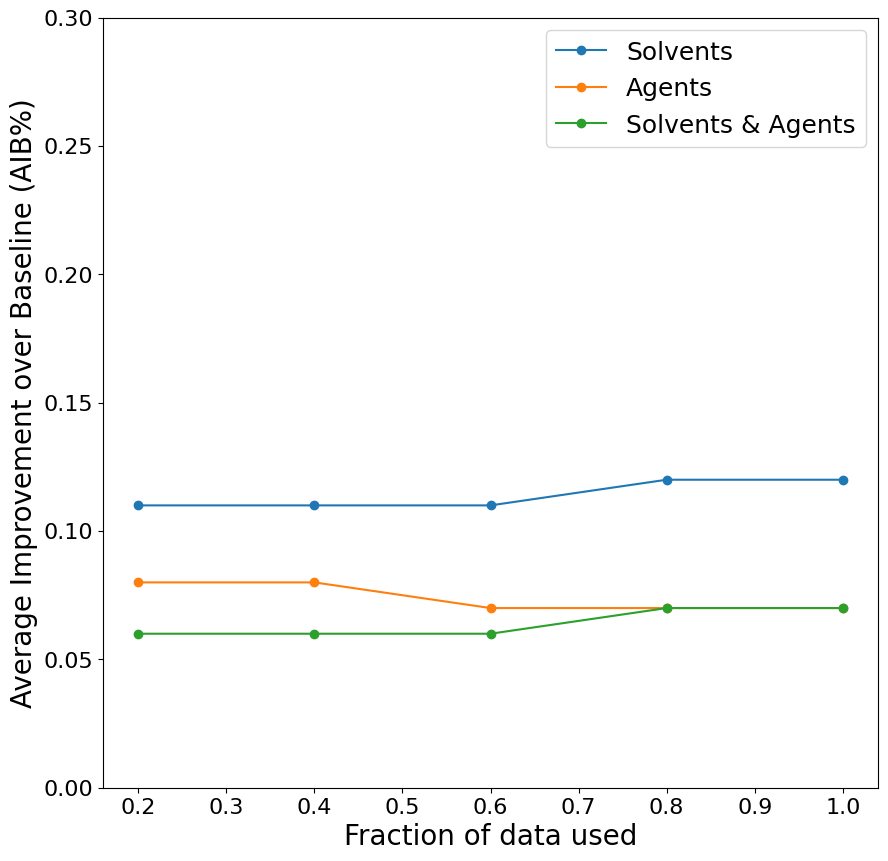

In [7]:
import matplotlib.pyplot as plt

# Data
x = [0.2, 0.4, 0.6, 0.8, 1]
solvents = [0.11, 0.11, 0.11, 0.12, 0.12]
agents = [0.08, 0.08, 0.07, 0.07, 0.07]
all_ = [0.06, 0.06, 0.06, 0.07, 0.07]

# Plotting with connected dots
plt.figure(figsize=(10, 10))
plt.plot(x, solvents, 'o-', label="Solvents")  # Connected dots for solvents
plt.plot(x, agents, 'o-', label="Agents")      # Connected dots for agents
plt.plot(x, all_, 'o-', label="Solvents & Agents")  # Connected dots for all

# Axis labels and title with increased font size
plt.xlabel("Fraction of data used", fontsize=20)
plt.ylabel("Average Improvement over Baseline (AIB%)", fontsize=20)
# plt.title("Average improvement over baseline, parameter sharing model", fontsize=16)

# Set y-axis range
plt.ylim(0, 0.3)
plt.rcParams.update({'font.size': 18})

# # Increase tick size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# change font size of 

# # Adjusting the legend font size
plt.legend(fontsize=18)


# Save the plot
plt.savefig("data_fraction.png", dpi=600)


# v6 results

In [ ]:
#534/534 - 1342s - loss: 10.8579 - mol1_loss: 2.6301 - mol2_loss: 1.5522 - mol3_loss: 2.6562 - mol4_loss: 1.6508 - mol5_loss: 0.6368 - mol1_acc: 0.2806 - mol1_top3: 0.5334 - mol1_top5: 0.6765 - mol2_acc: 0.6645 - mol2_top3: 0.7969 - mol2_top5: 0.8600 - mol3_acc: 0.4048 - mol3_top3: 0.6384 - mol3_top5: 0.7166 - mol4_acc: 0.6186 - mol4_top3: 0.8093 - mol4_top5: 0.8672 - mol5_acc: 0.8692 - mol5_top3: 0.9536 - mol5_top5: 0.9734 - val_loss: 11.0637 - val_mol1_loss: 2.6706 - val_mol2_loss: 1.5718 - val_mol3_loss: 2.7888 - val_mol4_loss: 1.6365 - val_mol5_loss: 0.6290 - val_mol1_acc: 0.2721 - val_mol1_top3: 0.5234 - val_mol1_top5: 0.6686 - val_mol2_acc: 0.6655 - val_mol2_top3: 0.7949 - val_mol2_top5: 0.8565 - val_mol3_acc: 0.3947 - val_mol3_top3: 0.6229 - val_mol3_top5: 0.6994 - val_mol4_acc: 0.6202 - val_mol4_top3: 0.8087 - val_mol4_top5: 0.8657 - val_mol5_acc: 0.8680 - val_mol5_top3: 0.9533 - val_mol5_top5: 0.9722 - training_throughput: 203.4407 - time_per_step: 2.5167 - 1342s/epoch - 3s/step
loss: 10.8579 - mol1_loss: 2.6301 - mol2_loss: 1.5522 - mol3_loss: 2.6562 - mol4_loss: 1.6508 - mol5_loss: 0.6368 - 
mol1_acc: 0.2806 - mol1_top3: 0.5334 - mol1_top5: 0.6765 - mol2_acc: 0.6645 - mol2_top3: 0.7969 - mol2_top5: 0.8600 - mol3_acc: 0.4048 - mol3_top3: 0.6384 - mol3_top5: 0.7166 - mol4_acc: 0.6186 - mol4_top3: 0.8093 - mol4_top5: 0.8672 - mol5_acc: 0.8692 - mol5_top3: 0.9536 - mol5_top5: 0.9734 - val_loss: 11.0637 - 
val_mol1_loss: 2.6706 - val_mol2_loss: 1.5718 - val_mol3_loss: 2.7888 - val_mol4_loss: 1.6365 - val_mol5_loss: 0.6290 - val_mol1_acc: 0.2721 - val_mol1_top3: 0.5234 - val_mol1_top5: 0.6686 - val_mol2_acc: 0.6655 - val_mol2_top3: 0.7949 - val_mol2_top5: 0.8565 - val_mol3_acc: 0.3947 - val_mol3_top3: 0.6229 - val_mol3_top5: 0.6994 - val_mol4_acc: 0.6202 - val_mol4_top3: 0.8087 - val_mol4_top5: 0.8657 - val_mol5_acc: 0.8680 - val_mol5_top3: 0.9533 - val_mol5_top5: 0.9722 - 

loss: 10.8579
val_mol1_top3: 0.5234
val_mol2_top3: 0.7949
val_mol3_top3: 0.6229
val_mol4_top3: 0.8087
val_mol5_top3: 0.9533
23min per epoch


In [ ]:
534/534 - 36s - loss: 5.8083 - mol1_loss: 1.8194 - mol2_loss: 1.2399 - mol3_loss: 1.4466 - mol4_loss: 0.9173 - mol5_loss: 0.3851 - mol1_acc: 0.4839 - mol1_top3: 0.7295 - mol1_top5: 0.8252 - mol2_acc: 0.6773 - mol2_top3: 0.8405 - 
mol2_top5: 0.9036 - mol3_acc: 0.6442 - mol3_top3: 0.8206 - mol3_top5: 0.8722 - mol4_acc: 0.7640 - mol4_top3: 0.9006 - mol4_top5: 0.9367 - mol5_acc: 0.8971 - mol5_top3: 0.9724 - mol5_top5: 0.9847 - val_loss: 8.7553 - 
val_mol1_loss: 2.4185 - val_mol2_loss: 1.5018 - val_mol3_loss: 2.5609 - val_mol4_loss: 1.6121 - val_mol5_loss: 0.6620 - val_mol1_acc: 0.3628 - val_mol1_top3: 0.6069 - val_mol1_top5: 0.7249 - val_mol2_acc: 0.6566 - val_mol2_top3: 0.8150 - val_mol2_top5: 0.8788 - val_mol3_acc: 0.4791 - val_mol3_top3: 0.6725 - val_mol3_top5: 0.7409 - val_mol4_acc: 0.6456 - val_mol4_top3: 0.8303 - val_mol4_top5: 0.8888 - val_mol5_acc: 0.8635 - val_mol5_top3: 0.9601 - val_mol5_top5: 0.9780 - training_throughput: 7590.3254 - time_per_step: 0.0675 - 36s/epoch - 67ms/step

loss: 5.8083
val_mol1_top3: 0.6069
val_mol2_top3: 0.8150
val_mol3_top3: 0.6725
val_mol4_top3: 0.8303
val_mol5_top3: 0.9601
1/2 min per epoch